# LIBRERIAS

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import logging
from cryptography.fernet import Fernet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import joblib

# ANALISIS DE DATOS

In [23]:
data = pd.read_csv("data_analisis.csv")

In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [51]:
data["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [26]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# EDA

In [81]:
sns.set(style="darkgrid")
plt.style.use("ggplot")

Distribución de la variable objetivo (Enfermedad Cardíaca)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17160\393686160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["target"], palette="rainbow")


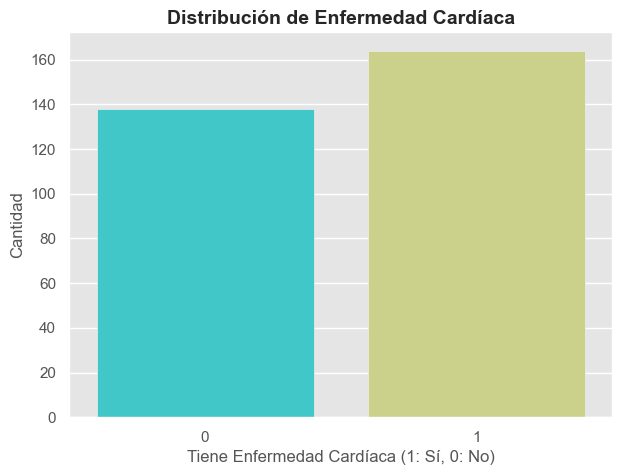

In [83]:
plt.figure(figsize=(7, 5))
sns.countplot(x=data["target"], palette="rainbow")
plt.title("Distribución de Enfermedad Cardíaca", fontsize=14, fontweight="bold")
plt.xlabel("Tiene Enfermedad Cardíaca (1: Sí, 0: No)", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.show()

Histograma de Edad

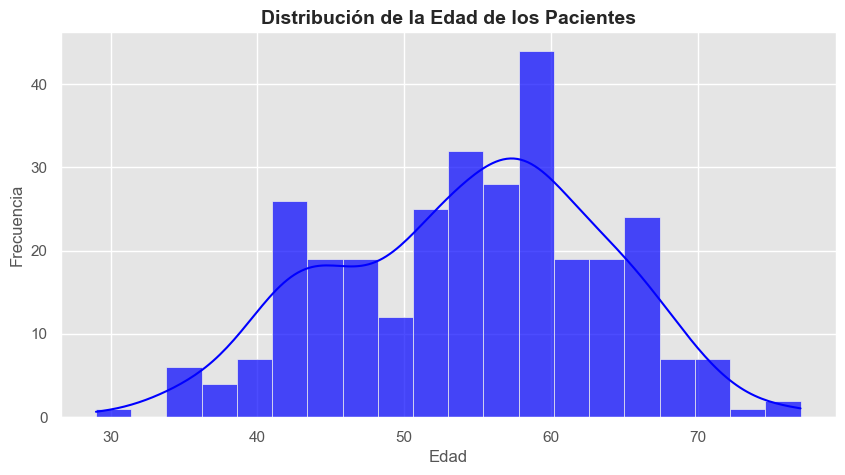

In [84]:
plt.figure(figsize=(10, 5))
sns.histplot(data["age"], bins=20, kde=True, color="blue", alpha=0.7)
plt.title("Distribución de la Edad de los Pacientes", fontsize=14, fontweight="bold")
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.show()

 Boxplot de la presión arterial en reposo por condición cardíaca

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17160\2866971460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["target"], y=data["trestbps"], palette="coolwarm")


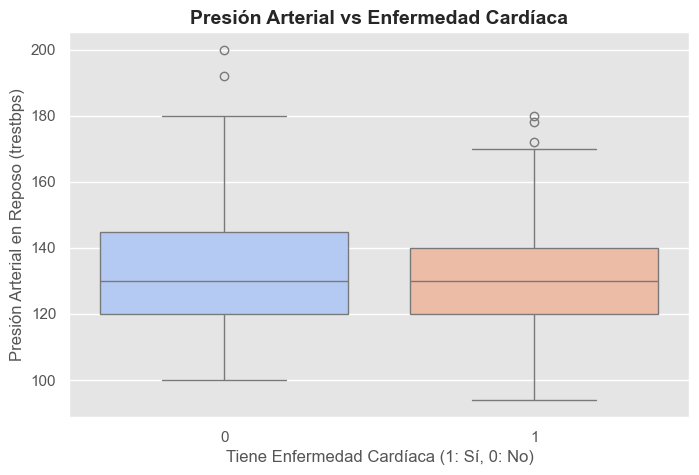

In [86]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["target"], y=data["trestbps"], palette="coolwarm")
plt.title("Presión Arterial vs Enfermedad Cardíaca", fontsize=14, fontweight="bold")
plt.xlabel("Tiene Enfermedad Cardíaca (1: Sí, 0: No)", fontsize=12)
plt.ylabel("Presión Arterial en Reposo (trestbps)", fontsize=12)
plt.show()


Matriz de Correlación

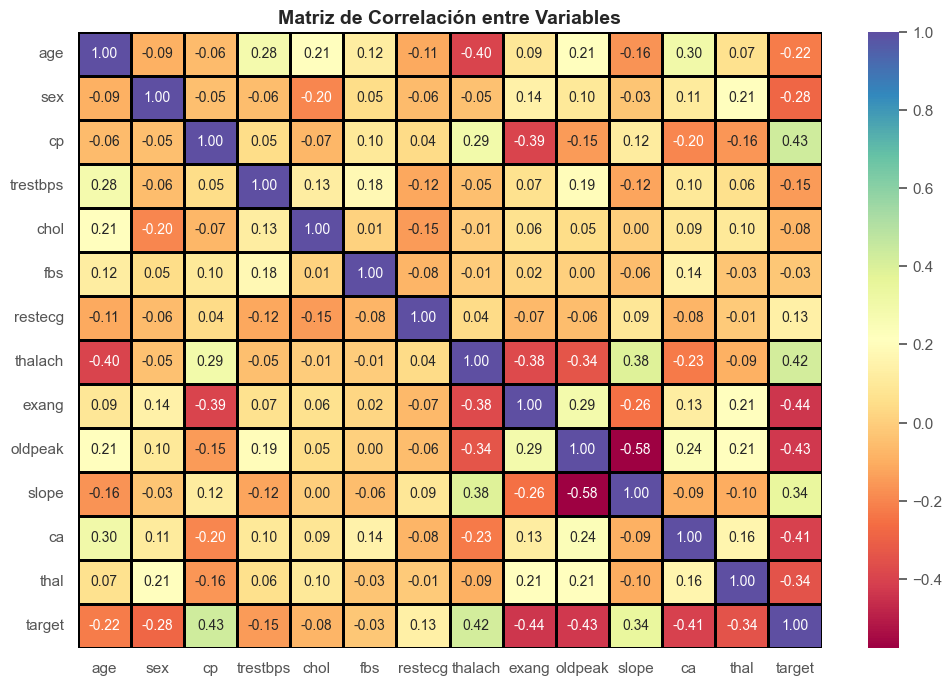

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="Spectral", linewidths=1, linecolor="black")
plt.title("Matriz de Correlación entre Variables", fontsize=14, fontweight="bold")
plt.show()

Pairplot de las variables

<Figure size 1200x1200 with 0 Axes>

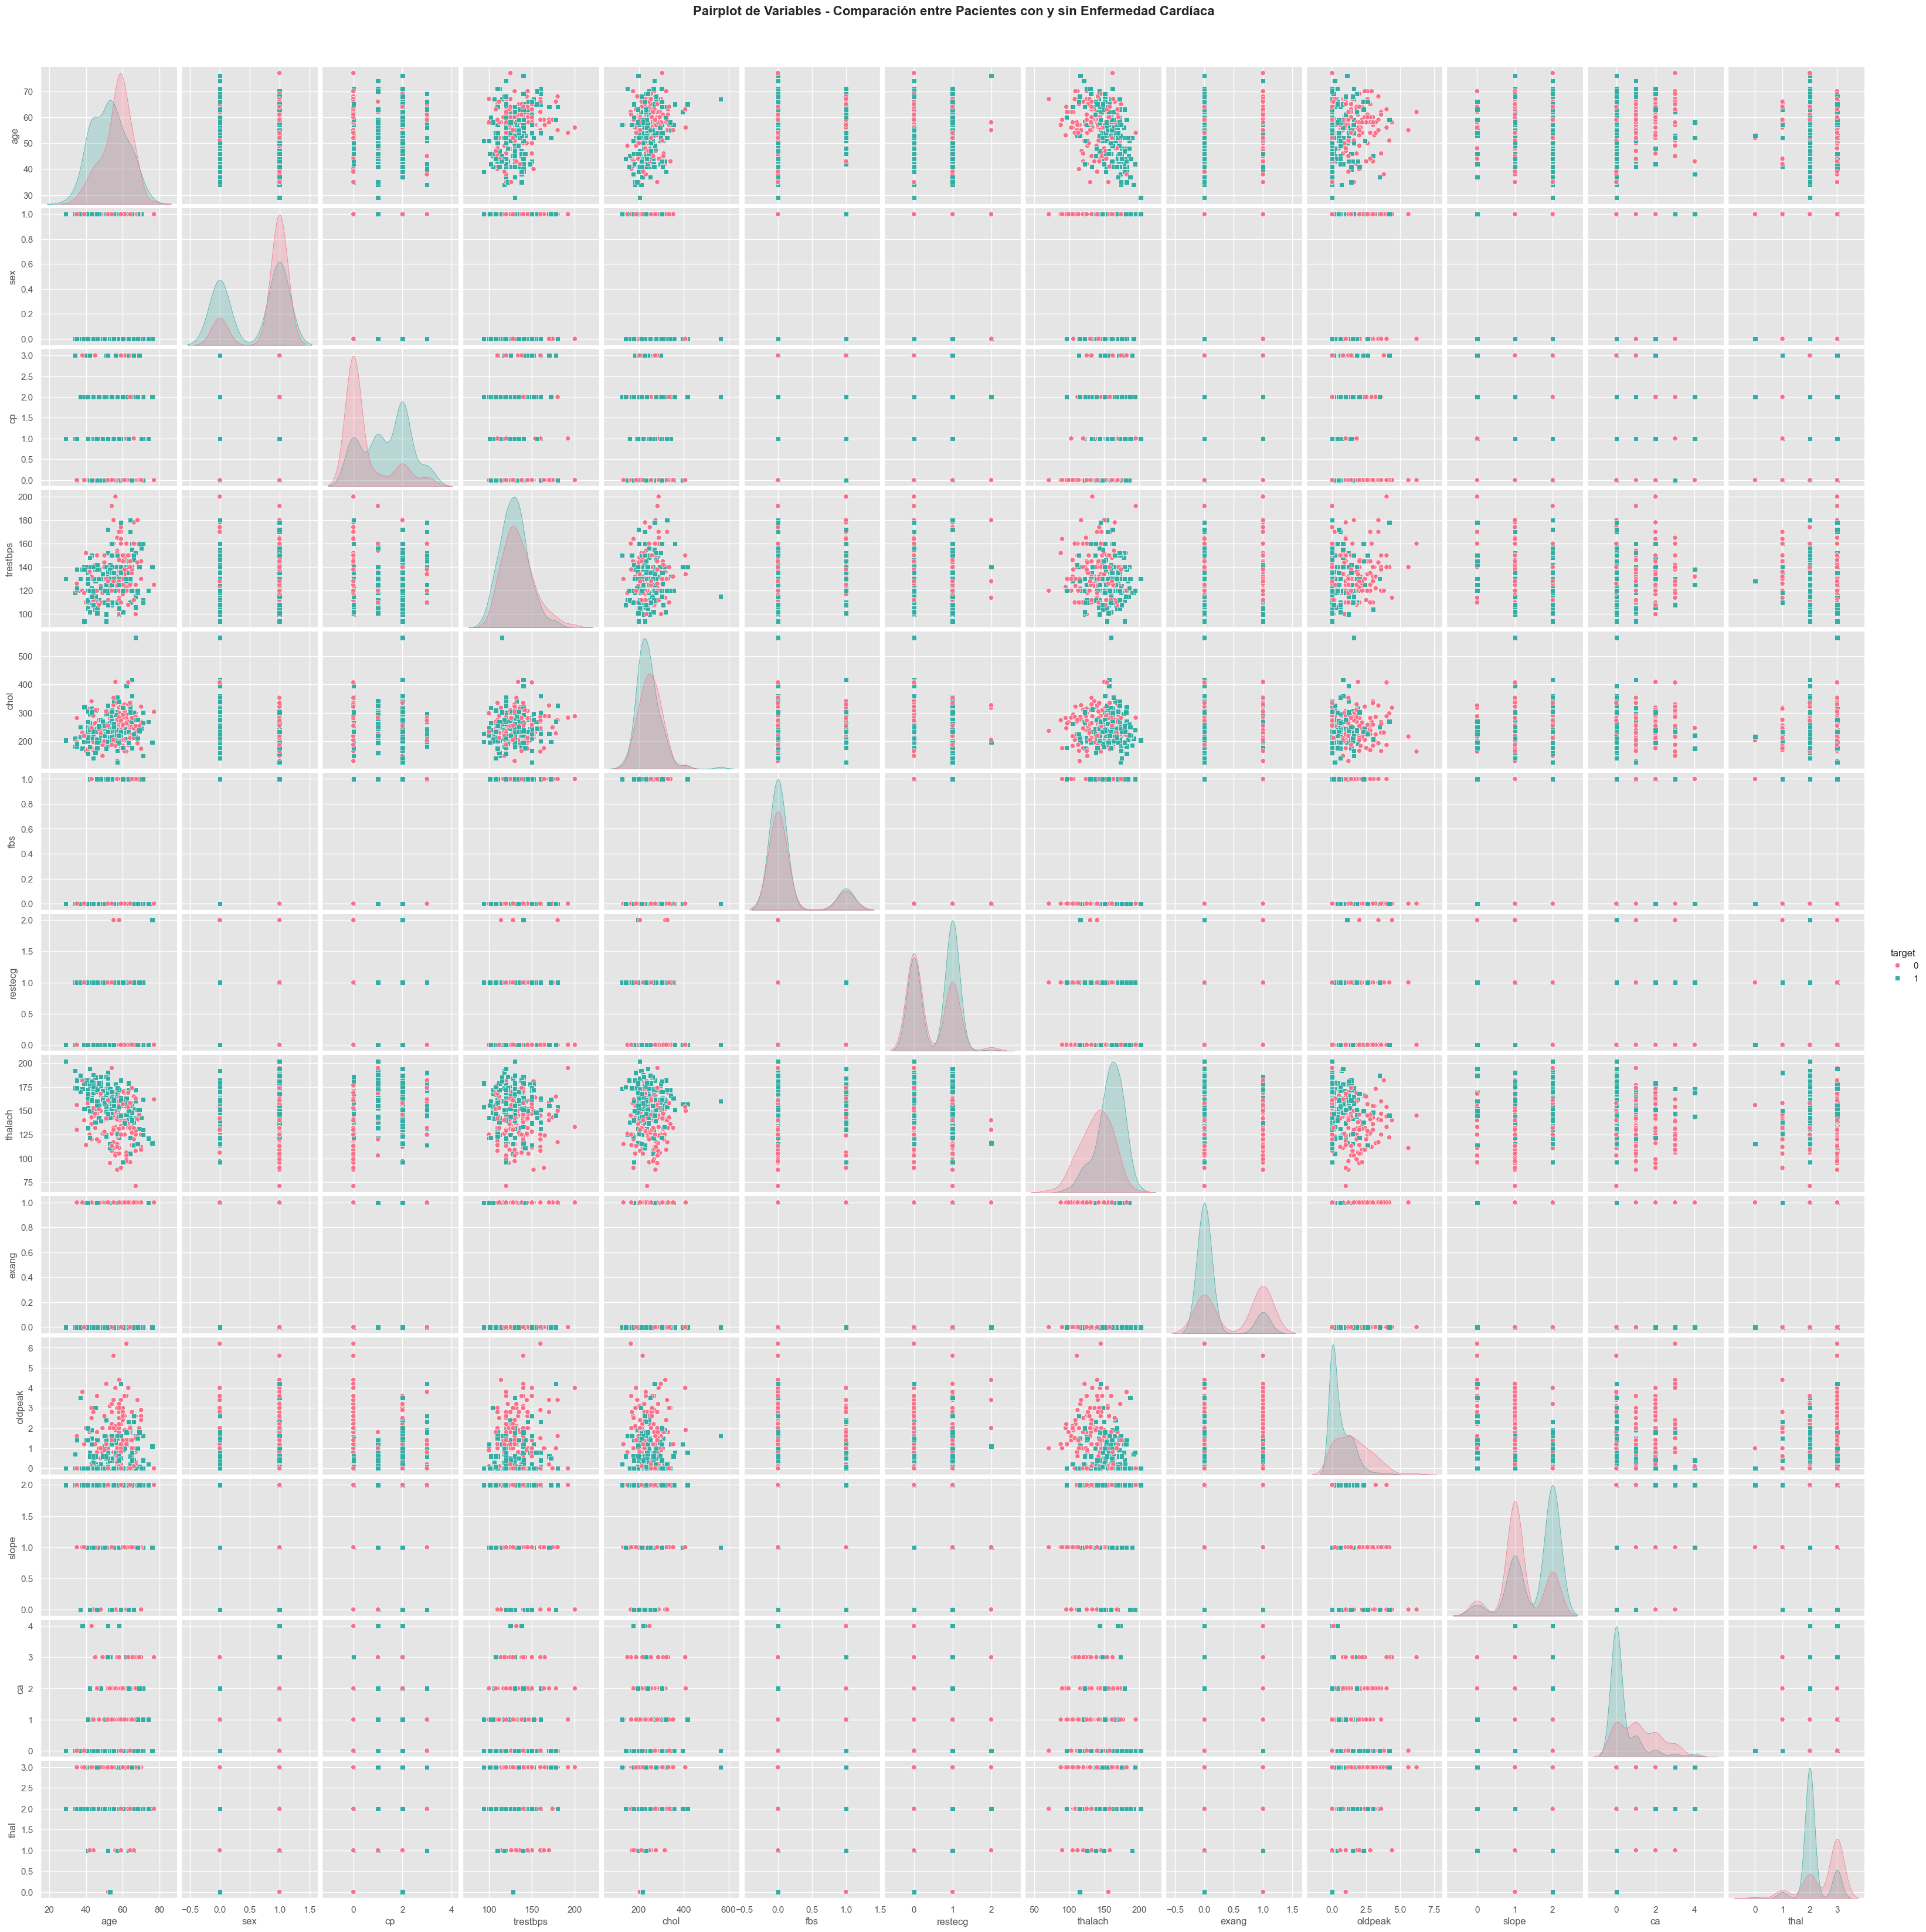

In [89]:
plt.figure(figsize=(12, 12))
sns.pairplot(data, hue="target", palette="husl", diag_kind="kde", markers=["o", "s"])
plt.suptitle("Pairplot de Variables - Comparación entre Pacientes con y sin Enfermedad Cardíaca", fontsize=16, fontweight="bold", y=1.02)
plt.show()

# RANDOM FOREST

In [67]:
X = data.drop(columns=["target"], axis=1)
y = data["target"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

In [69]:
rf = RandomForestClassifier(
        n_estimators=100,
        criterion="entropy",
        max_depth=7,
        min_samples_leaf=2,
        max_features="sqrt",
        random_state=2
    )


In [70]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       random_state=2)

In [71]:
train_preds = rf.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
print(f"Accuracy en Training data:  {train_acc * 100:.2f}%")

Accuracy en Training data:  99.17%


In [72]:
test_preds = rf.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print(f"Accuracy en Test data:  {test_acc * 100:.2f}%")

Accuracy en Test data:  78.69%


In [75]:
y_pred_test = rf.predict(X_test)

In [ ]:
unique, counts = np.unique(y_pred_test, return_counts=True)
print("Distribución de predicciones en test set:", dict(zip(unique, counts)))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_test))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_test))

Distribución de predicciones en test set: {np.int64(0): np.int64(29), np.int64(1): np.int64(32)}

Matriz de Confusión:
[[22  6]
 [ 7 26]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



# EMPAQUETADO DEL MODELO

In [73]:
joblib.dump(rf, "modelo_rf.pkl")
print("Modelo guardado en 'modelo_rf.pkl'")

Modelo guardado en 'modelo_rf.pkl'
